**Imports**

In [1]:
# imports
import os
import json as j
import numpy as np

# Import torch
import torch
import torch.nn as nn
import torch.optim as optim

**Sample data**

In [2]:
path_dir = os.path.dirname("")
with open(os.path.join(path_dir, 'timeseries_pheno_metrics.json')) as f:
    json = j.load(f)
    f.close()

X_train = json["timeseries_pheno_metrics"]
y_train = json["label_id"]

In [3]:
'''new_X_train = []
new_y_train = []

for i in range(len(y_train)):
    if int(y_train[i]) == 370:
        new_X_train.append(X_train[i])
        new_y_train.append(y_train[i])
    if int(y_train[i]) == 372:
        new_X_train.append(X_train[i])
        new_y_train.append(y_train[i])
    if int(y_train[i]) == 365:
        new_X_train.append(X_train[i])
        new_y_train.append(y_train[i])
    if int(y_train[i]) == 359:
        new_X_train.append(X_train[i])
        new_y_train.append(y_train[i])'''

'new_X_train = []\nnew_y_train = []\n\nfor i in range(len(y_train)):\n    if int(y_train[i]) == 370:\n        new_X_train.append(X_train[i])\n        new_y_train.append(y_train[i])\n    if int(y_train[i]) == 372:\n        new_X_train.append(X_train[i])\n        new_y_train.append(y_train[i])\n    if int(y_train[i]) == 365:\n        new_X_train.append(X_train[i])\n        new_y_train.append(y_train[i])\n    if int(y_train[i]) == 359:\n        new_X_train.append(X_train[i])\n        new_y_train.append(y_train[i])'

**Convert data to PyTorch tensors**

In [4]:
X_train_tensor = torch.tensor(np.expand_dims(X_train, axis=1), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

print(X_train_tensor.shape)

torch.Size([862, 1, 41])


**LSTM classifier model**

In [5]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

**Define model parameters**

In [6]:
input_size = X_train_tensor.shape[2]
hidden_size = 128
num_layers = 2
output_size = len(set(y_train_tensor))

**Instantiate**

In [7]:
model = LSTMClassifier(input_size, hidden_size, num_layers, output_size)

**Loss function and optimizer**

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**Train the model**

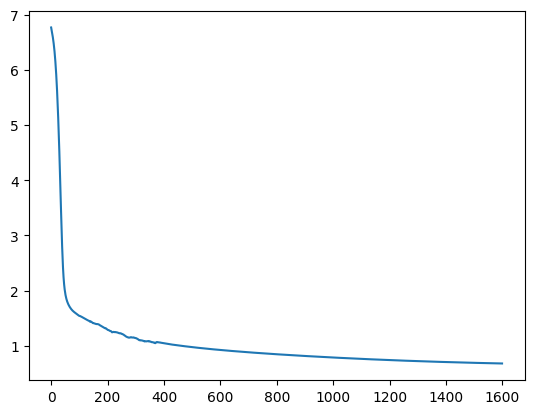

In [9]:
import matplotlib.pyplot as plt 

num_epochs = 1600
loss_list = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

plt.plot(range(0,num_epochs),loss_list)

**Model Accuracy**

In [10]:
with open(os.path.join(path_dir, 'test_timeseries_pheno_metrics.json')) as ff:
    json_test = j.load(ff)
    ff.close()

X_test = json_test["timeseries_pheno_metrics"]
y_test = json_test["label_id"]

X_test_tensor = torch.tensor(np.expand_dims(X_test, axis=1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(X_test_tensor.shape)

torch.Size([350, 1, 41])


In [11]:
def return_class_by_id(id):
    if 370: return "Soja"
    if 372: return "Arroz"
    if 359: return "Vegetação Florestal"
    if 365: return "Corpos d'agua"
    if 367: return "Superfícies Artificiais"
    if 363: return "Pastagem"
    if 361: return "Formação Campestre"

In [12]:
'''new_X_test = []
new_y_test = []

for i in range(len(y_test)):
    if int(y_test[i]) == 370:
        new_X_test.append(X_test[i])
        new_y_test.append(y_test[i])
    if int(y_test[i]) == 372:
        new_X_test.append(X_test[i])
        new_y_test.append(y_test[i])
    if int(y_test[i]) == 365:
        new_X_test.append(X_test[i])
        new_y_test.append(y_test[i])
    if int(y_test[i]) == 359:
        new_X_test.append(X_test[i])
        new_y_test.append(y_test[i])'''

'new_X_test = []\nnew_y_test = []\n\nfor i in range(len(y_test)):\n    if int(y_test[i]) == 370:\n        new_X_test.append(X_test[i])\n        new_y_test.append(y_test[i])\n    if int(y_test[i]) == 372:\n        new_X_test.append(X_test[i])\n        new_y_test.append(y_test[i])\n    if int(y_test[i]) == 365:\n        new_X_test.append(X_test[i])\n        new_y_test.append(y_test[i])\n    if int(y_test[i]) == 359:\n        new_X_test.append(X_test[i])\n        new_y_test.append(y_test[i])'

In [13]:
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_labels = torch.argmax(predictions, dim=1)

correct_count = sum(a == b for a, b in zip(y_test_tensor, predicted_labels))
overlap = float(correct_count) / len(y_test_tensor) * 100

float(overlap)

42.857142857142854

**S2 Data Cubes**

In [14]:
from cshd import cshd_img_cube, get_timeseries_cshd_dataset, params_phenometrics, cshd_array, calc_phenometrics

In [15]:
S2_NDVI_cube = cshd_img_cube(
    data_dir=os.path.join(path_dir,'021037/')
)

S2_NDVI_cube

<xarray.Dataset> Size: 10GB
Dimensions:      (band: 1, x: 10560, y: 10560, time: 23)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 84kB 4.842e+06 4.842e+06 ... 4.947e+06 4.947e+06
  * y            (y) float64 84kB 8.046e+06 8.046e+06 ... 7.941e+06 7.941e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 184B 2023-01-01 2023-01-17 ... 2023-12-19
Data variables:
    band_data    (time, band, y, x) float32 10GB 4.534e+03 ... 8.01e+03

In [16]:
S2_SCL_cube = cshd_img_cube(
    data_dir=os.path.join(path_dir,'SCL_021037/')
)

S2_SCL_cube

<xarray.Dataset> Size: 10GB
Dimensions:      (band: 1, x: 10560, y: 10560, time: 23)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 84kB 4.842e+06 4.842e+06 ... 4.947e+06 4.947e+06
  * y            (y) float64 84kB 8.046e+06 8.046e+06 ... 7.941e+06 7.941e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 184B 2023-01-01 2023-01-17 ... 2023-12-19
Data variables:
    band_data    (time, band, y, x) float32 10GB 5.0 4.0 4.0 4.0 ... 4.0 4.0 4.0

**Cloud cover**

In [17]:
cloud_dict = {
    'S2-16D-2':{
        'cloud_band': 'SCL',
        'non_cloud_values': [4,5,6],
        'cloud_values': [0,1,2,3,7,8,9,10,11]
    }
}

cloud = cloud_dict['S2-16D-2']

In [18]:
def create_filter_array(array, filter_true, filter_false):
    filter_arr = []
    for element in array:
        if element in filter_true:
            filter_arr.append(0)
        if element in filter_false:
            filter_arr.append(1)
    return filter_arr

In [19]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1,
    date_format='full'
)

**Begin Map**

In [20]:
classification = S2_NDVI_cube['band_data'].sel(time='2023-01-01')

In [21]:
'''LCC_S2 = cshd_img_cube(
    data_dir=os.path.join(path_dir,'output/')
)

LCC_S2'''

"LCC_S2 = cshd_img_cube(\n    data_dir=os.path.join(path_dir,'output/')\n)\n\nLCC_S2"

**Interact the Data Cube**

In [22]:
import warnings
warnings.filterwarnings("ignore")

def get_prediction(x, y):
    # Get raw time series from cube
    data = get_timeseries_cshd_dataset(
        cube=S2_NDVI_cube, 
        geom=[dict(coordinates = [x, y])]
    )
    raw_timeseries = data['values']

    # Get cloud time series from cloud cube
    cloud_data = get_timeseries_cshd_dataset(
        cube=S2_SCL_cube, 
        geom=[dict(coordinates = [x, y])]
    )
    cloud_array = create_filter_array(cloud_data['values'], cloud['cloud_values'], cloud['non_cloud_values'])

    # Apply cloud mask on raw time series
    for i in range(len(data['values'])):
        if cloud_array[i] == 0:
            raw_timeseries[i] = -9999

    # Create a xarray for time series
    ndvi_array = cshd_array(
        timeserie=raw_timeseries,
        start_date='2023-01-01',
        freq='16D'
    )

    # Calculate phenological metrics from xarray time series
    ds_phenos = calc_phenometrics(
        da=ndvi_array,
        engine='phenolopy',
        config=config,
        start_date='2023-01-01'
    )

    # Build LSTM input array from time series and phenological metrics
    tl = list(raw_timeseries) + list(ds_phenos)

    # Create a torch tensor
    X_test_tensor = torch.tensor(np.expand_dims([tl], axis=1), dtype=torch.float32)

    # Use train model to predict a class based on argmax
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predicted_labels = torch.argmax(predictions, dim=1)

        # Prediction
        classification.sel(x=x, y=y).values[()] = predicted_labels[0]

In [29]:
for i in range(7150, 7300): #len(S2_NDVI_cube['x'])):
    for j in range(7150, 7300): #len(S2_NDVI_cube['x'])):
        get_prediction(classification['x'][i].x.values[()], classification['y'][j].y.values[()])

In [30]:
classification.rio.to_raster(os.path.join(path_dir, "output", "LCC_S2-16D_V2_021037_20230101.tif"))